In [1]:
# Import essential libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import math as math
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
%matplotlib inline
sb.set()
plt.style.use('fivethirtyeight') 

# Decision Tree

In [2]:
games = pd.read_csv('games-prediction-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0
1,False,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,0,0,1
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1
3,False,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,0,0,1
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1


[Text(0.6910526315789474, 0.9545454545454546, 'K_cluster_2 <= 0.5\ngini = 0.457\nsamples = 8134\nvalue = [2877, 5257]\nclass = good'),
 Text(0.4786184210526316, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.471\nsamples = 7078\nvalue = [2682, 4396]\nclass = good'),
 Text(0.31796052631578947, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.463\nsamples = 6669\nvalue = [2427, 4242]\nclass = good'),
 Text(0.18013157894736842, 0.6818181818181818, 'discount_price <= 1.005\ngini = 0.447\nsamples = 4880\nvalue = [1644, 3236]\nclass = good'),
 Text(0.1013157894736842, 0.5909090909090909, 'discount_price <= 0.44\ngini = 0.472\nsamples = 1222\nvalue = [467, 755]\nclass = good'),
 Text(0.05789473684210526, 0.5, 'genre_Strategy <= 0.5\ngini = 0.457\nsamples = 898\nvalue = [317, 581]\nclass = good'),
 Text(0.03315789473684211, 0.4090909090909091, 'genre_Racing <= 0.5\ngini = 0.443\nsamples = 715\nvalue = [237, 478]\nclass = good'),
 Text(0.016842105263157894, 0.3181818181

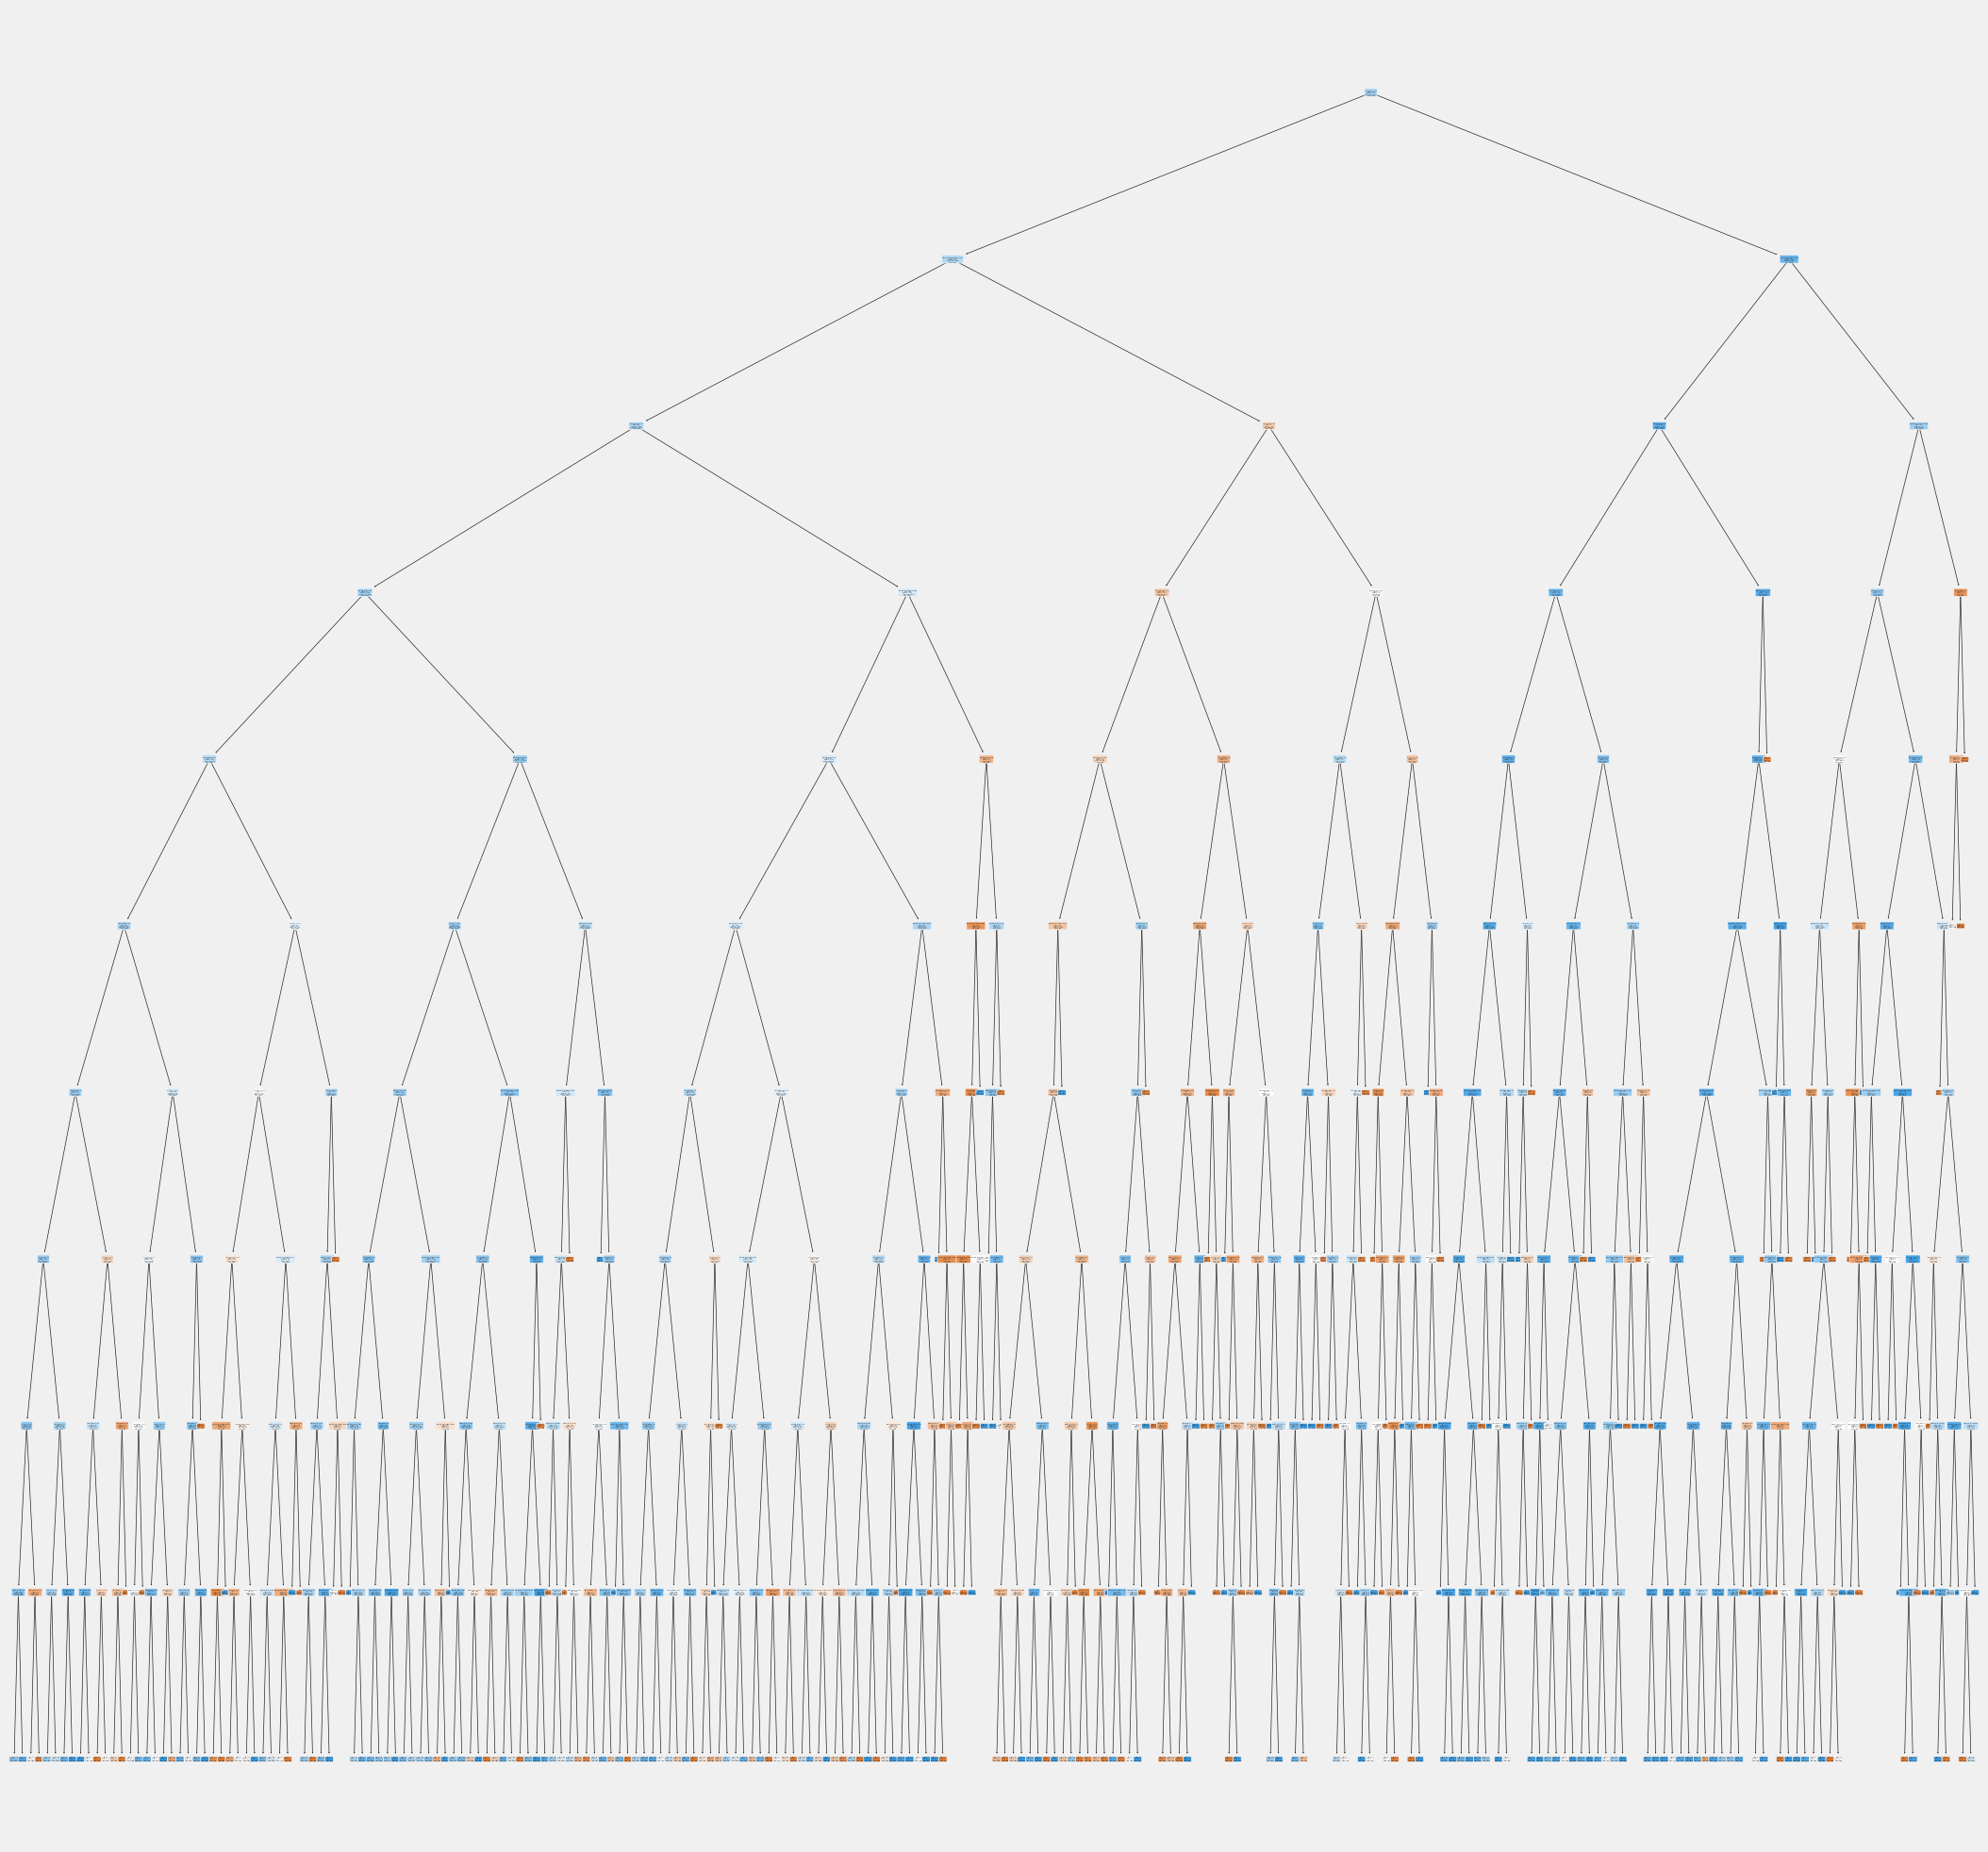

In [3]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6990410622080158

TPR Train :	 0.9402701160357618
TNR Train :	 0.25825512686826557

FPR Train :	 0.7417448731317344
FNR Train :	 0.05972988396423816


<AxesSubplot:>

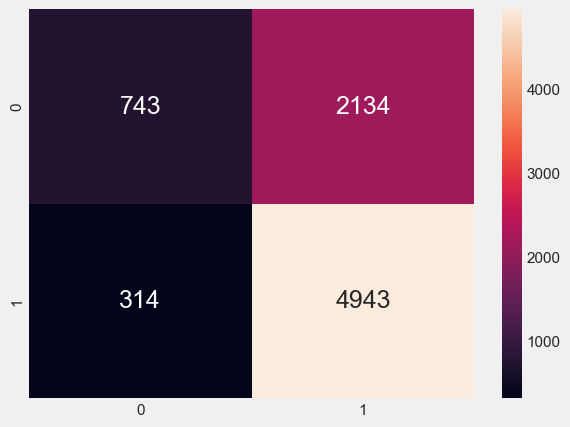

In [4]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6640849110728628

TPR Test :	 0.9092891408634975
TNR Test :	 0.19279128248113997

FPR Test :	 0.80720871751886
FNR Test :	 0.0907108591365024


<AxesSubplot:>

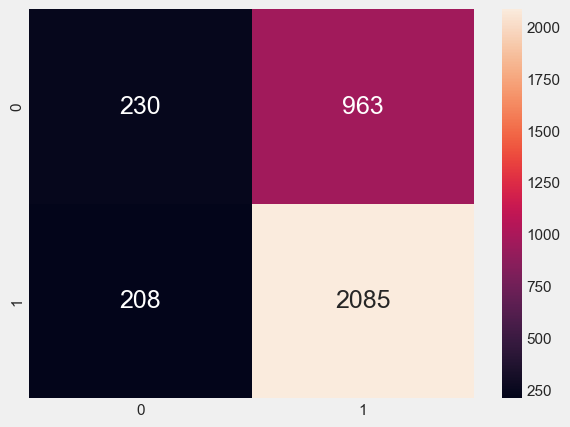

In [5]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

There is a huge imbalance in the *False Positives* and *False Negatives* in the confusion matrix. *False Positives* are much higher in number than *False Negatives* in both Train and Test data. This is a direct effect of the large `Good` vs `Bad` class imbalance in the response variable `Status`. As `Status = Good` was more likely in the data, *False Positives* are more likely too. This class imbalance is important to resolve as we do not want a biased model. Going back to our problem stated, of idenitfying good/bad games, an important part is on identifying potential bad games as to not let consumers waste money on them. Thus the predicition of bad games is important.

# Decision Tree - Oversampling

In [6]:
games = pd.read_csv('games-prediction-over-resampling.csv', index_col= 0)
games.head()

,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4,recommend
0,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0,True
1,29.99,29.99,0.000000,True,1,1,0,1,0,0,0,0,0,0,0,0,0,1,False
2,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1,True
3,44.99,44.99,0.000000,False,1,1,0,1,0,0,0,0,0,0,0,0,0,1,False
4,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1,True


[Text(0.6974760910560345, 0.9545454545454546, 'K_cluster_2 <= 0.5\ngini = 0.493\nsamples = 9513\nvalue = [4190, 5323]\nclass = good'),
 Text(0.48780980603448276, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.498\nsamples = 8312\nvalue = [3882, 4430]\nclass = good'),
 Text(0.33088631465517243, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.495\nsamples = 7765\nvalue = [3495, 4270]\nclass = good'),
 Text(0.19349407327586207, 0.6818181818181818, 'genre_Strategy <= 0.5\ngini = 0.488\nsamples = 5606\nvalue = [2367, 3239]\nclass = good'),
 Text(0.10910560344827586, 0.5909090909090909, 'genre_Adventure <= 0.5\ngini = 0.483\nsamples = 4487\nvalue = [1834, 2653]\nclass = good'),
 Text(0.05522629310344827, 0.5, 'original_price <= 24.865\ngini = 0.475\nsamples = 2638\nvalue = [1025, 1613]\nclass = good'),
 Text(0.03125, 0.4090909090909091, 'discount_price <= 1.935\ngini = 0.469\nsamples = 2372\nvalue = [889, 1483]\nclass = good'),
 Text(0.017241379310344827, 0.31818181

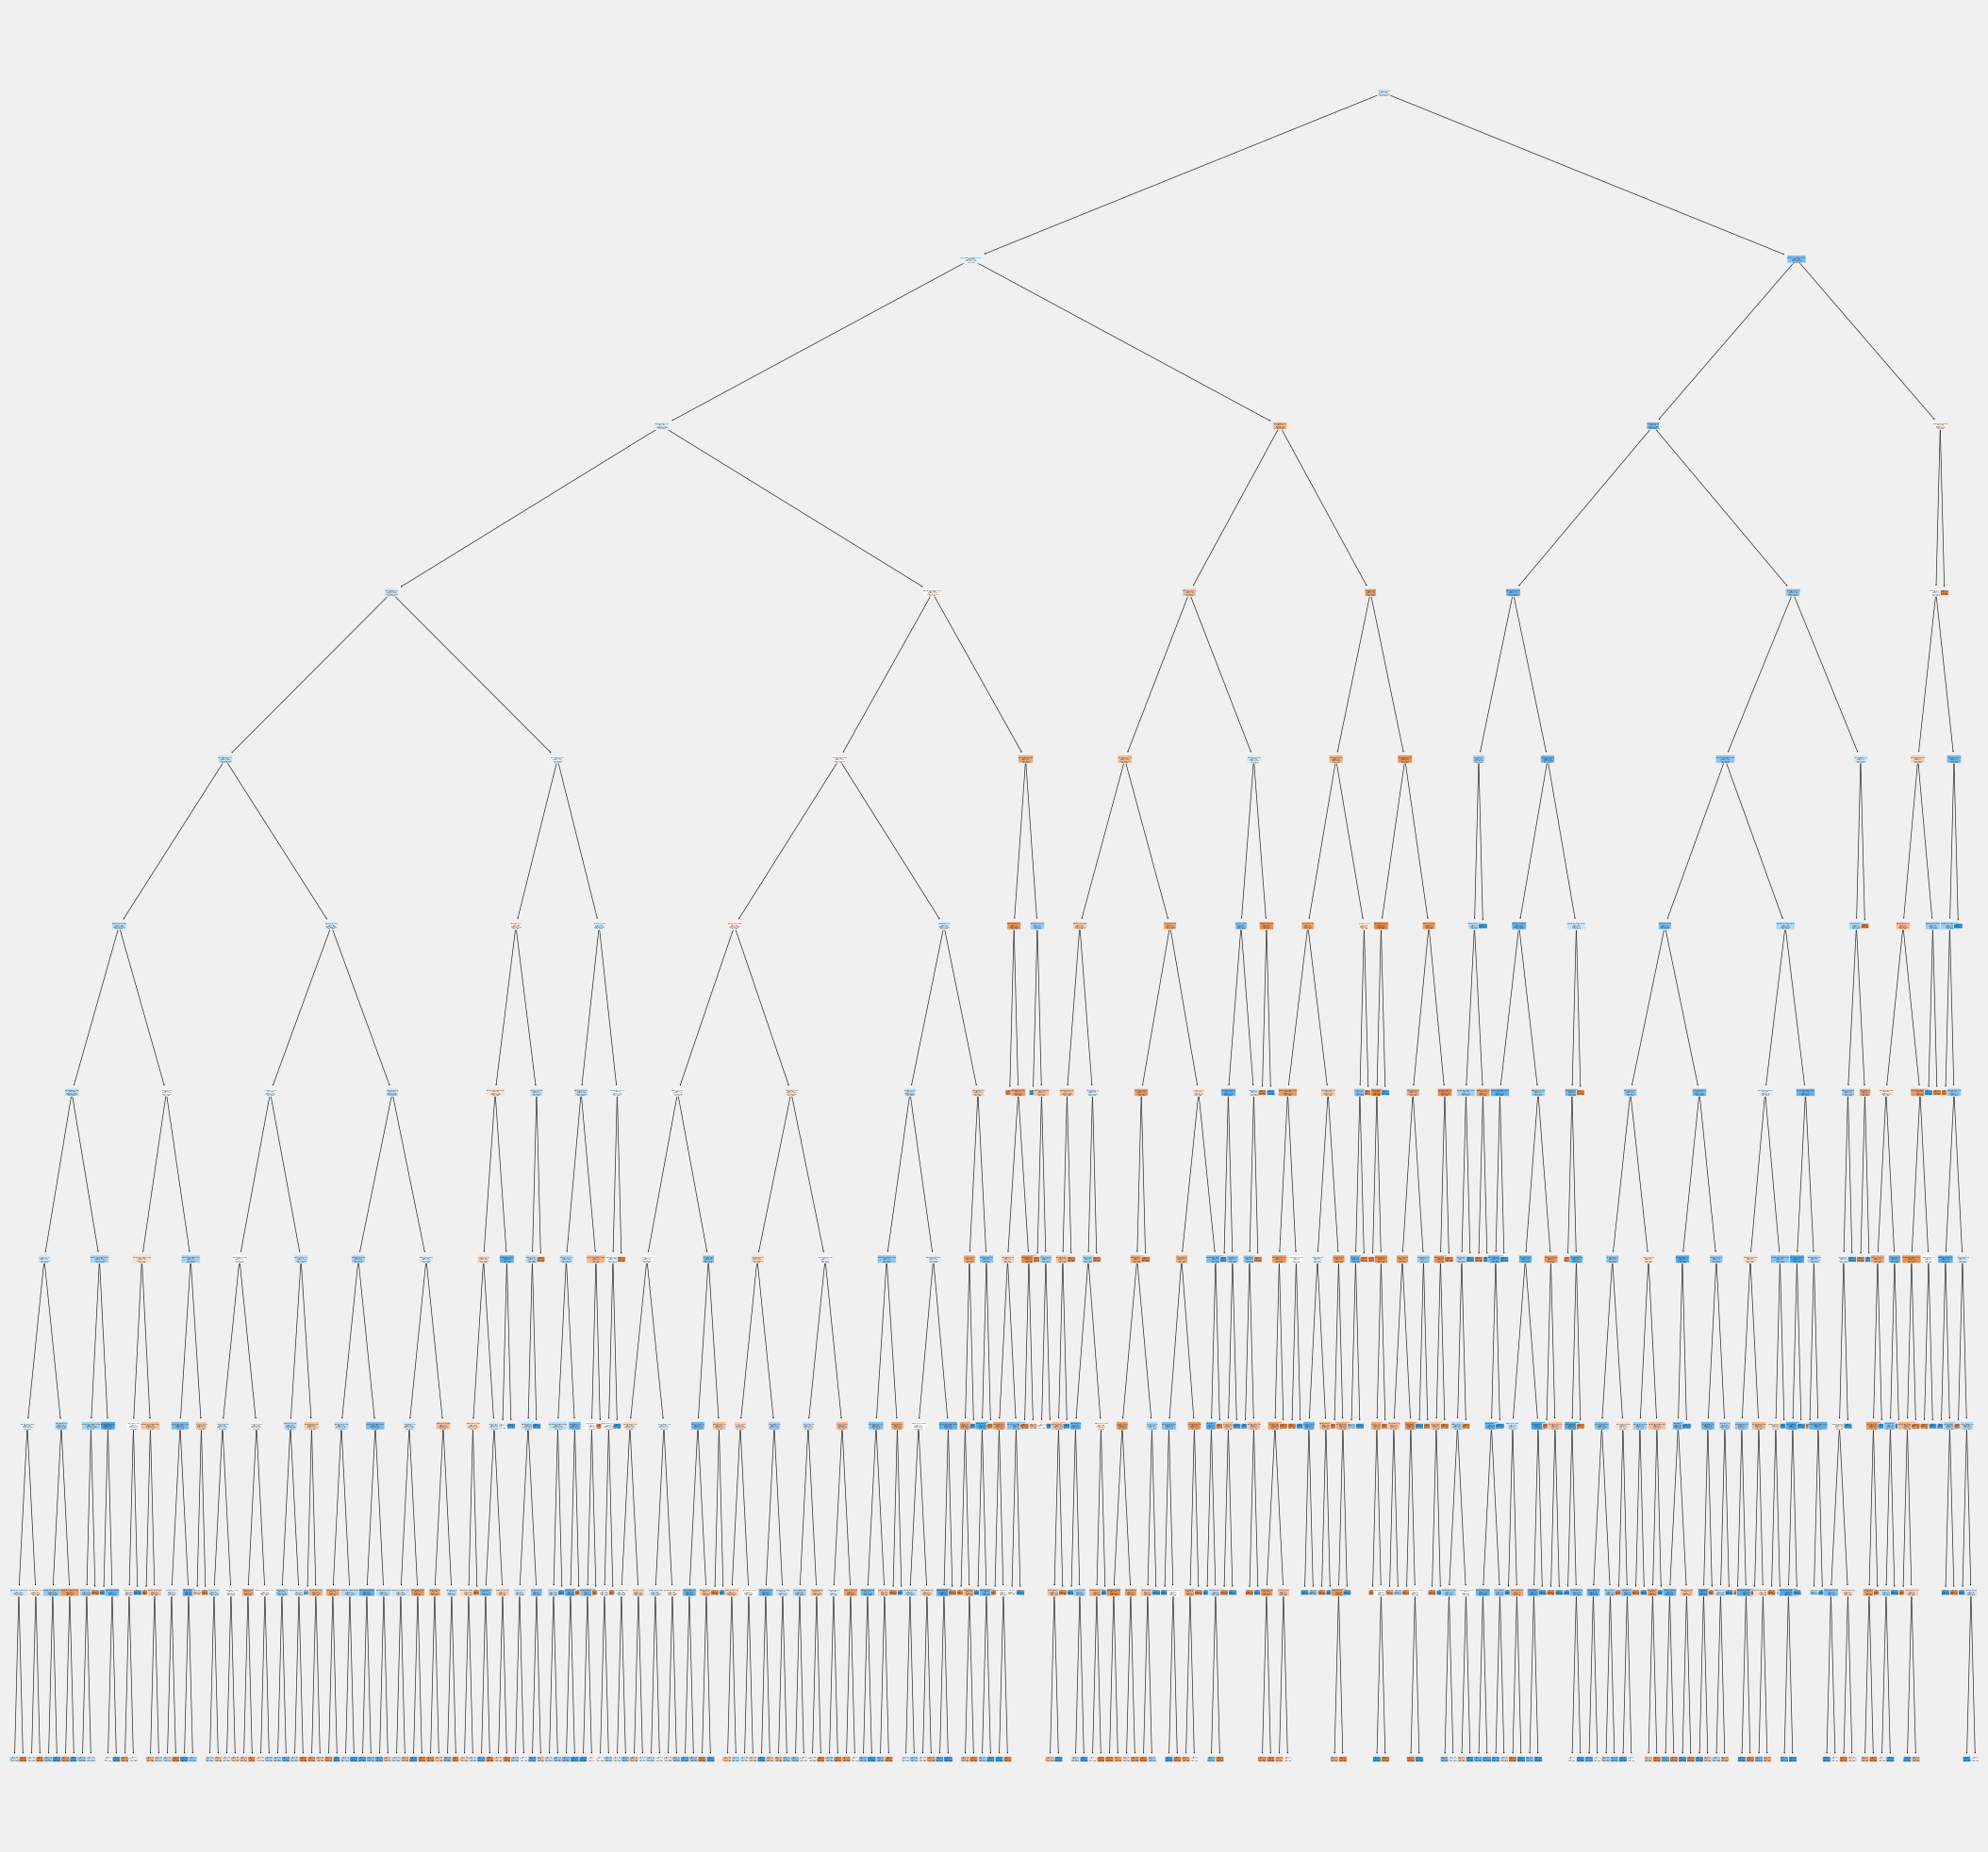

In [7]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6656154735624934

TPR Train :	 0.7756904001502912
TNR Train :	 0.5257756563245823

FPR Train :	 0.47422434367541766
FNR Train :	 0.2243095998497088


<AxesSubplot:>

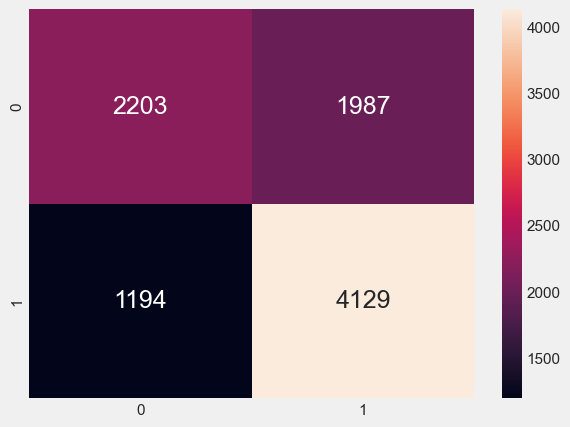

In [8]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6014226146676478

TPR Test :	 0.7215985630893579
TNR Test :	 0.45675675675675675

FPR Test :	 0.5432432432432432
FNR Test :	 0.2784014369106421


<AxesSubplot:>

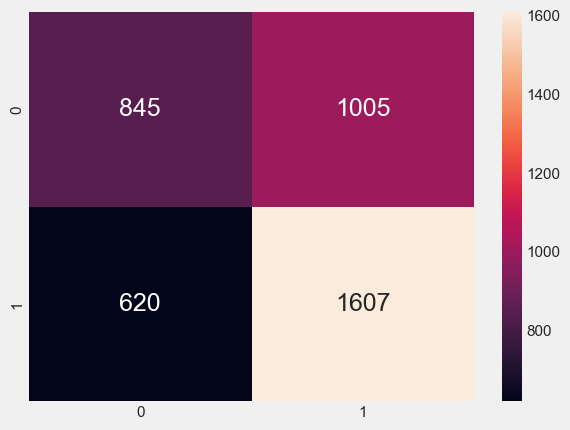

In [9]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

# Decision Tree - Balanced Sampling

In [10]:
games = pd.read_csv('games-prediction-balanced-resampling.csv', index_col= 0)
games.head()

,recommend,original_price,discount_price,discount_percentage,mature_content,genre_Action,genre_Adventure,genre_Casual,genre_Massively Multiplayer,genre_RPG,genre_Racing,genre_Simulation,genre_Sports,genre_Strategy,K_cluster_0,K_cluster_1,K_cluster_2,K_cluster_3,K_cluster_4
0,True,19.99,14.99,25.012506,False,1,0,0,0,0,0,0,0,0,0,0,1,0,0
2,True,39.99,39.99,0.000000,False,1,1,0,0,0,0,0,0,1,0,0,0,0,1
4,True,0.00,0.00,0.000000,False,1,0,0,1,1,0,0,0,1,0,0,0,0,1
8,True,29.99,29.99,0.000000,False,0,0,0,0,0,0,0,0,1,0,0,0,0,1
10,True,19.99,19.99,0.000000,False,0,1,0,0,1,0,0,0,1,0,0,0,0,1


[Text(0.6414522977022977, 0.9545454545454546, 'K_cluster_2 <= 0.5\ngini = 0.5\nsamples = 10570\nvalue = [5247, 5323]\nclass = good'),
 Text(0.43024163336663335, 0.8636363636363636, 'genre_Massively Multiplayer <= 0.5\ngini = 0.499\nsamples = 9319\nvalue = [4878, 4441]\nclass = bad'),
 Text(0.3000437062937063, 0.7727272727272727, 'genre_Simulation <= 0.5\ngini = 0.5\nsamples = 8692\nvalue = [4397, 4295]\nclass = bad'),
 Text(0.18412837162837162, 0.6818181818181818, 'original_price <= 29.925\ngini = 0.499\nsamples = 6208\nvalue = [2953, 3255]\nclass = good'),
 Text(0.11288711288711288, 0.5909090909090909, 'discount_price <= 13.47\ngini = 0.498\nsamples = 5648\nvalue = [2639, 3009]\nclass = good'),
 Text(0.06243756243756244, 0.5, 'genre_Strategy <= 0.5\ngini = 0.499\nsamples = 4817\nvalue = [2307, 2510]\nclass = good'),
 Text(0.03196803196803197, 0.4090909090909091, 'genre_Adventure <= 0.5\ngini = 0.498\nsamples = 3858\nvalue = [1796, 2062]\nclass = good'),
 Text(0.015984015984015984, 0.3

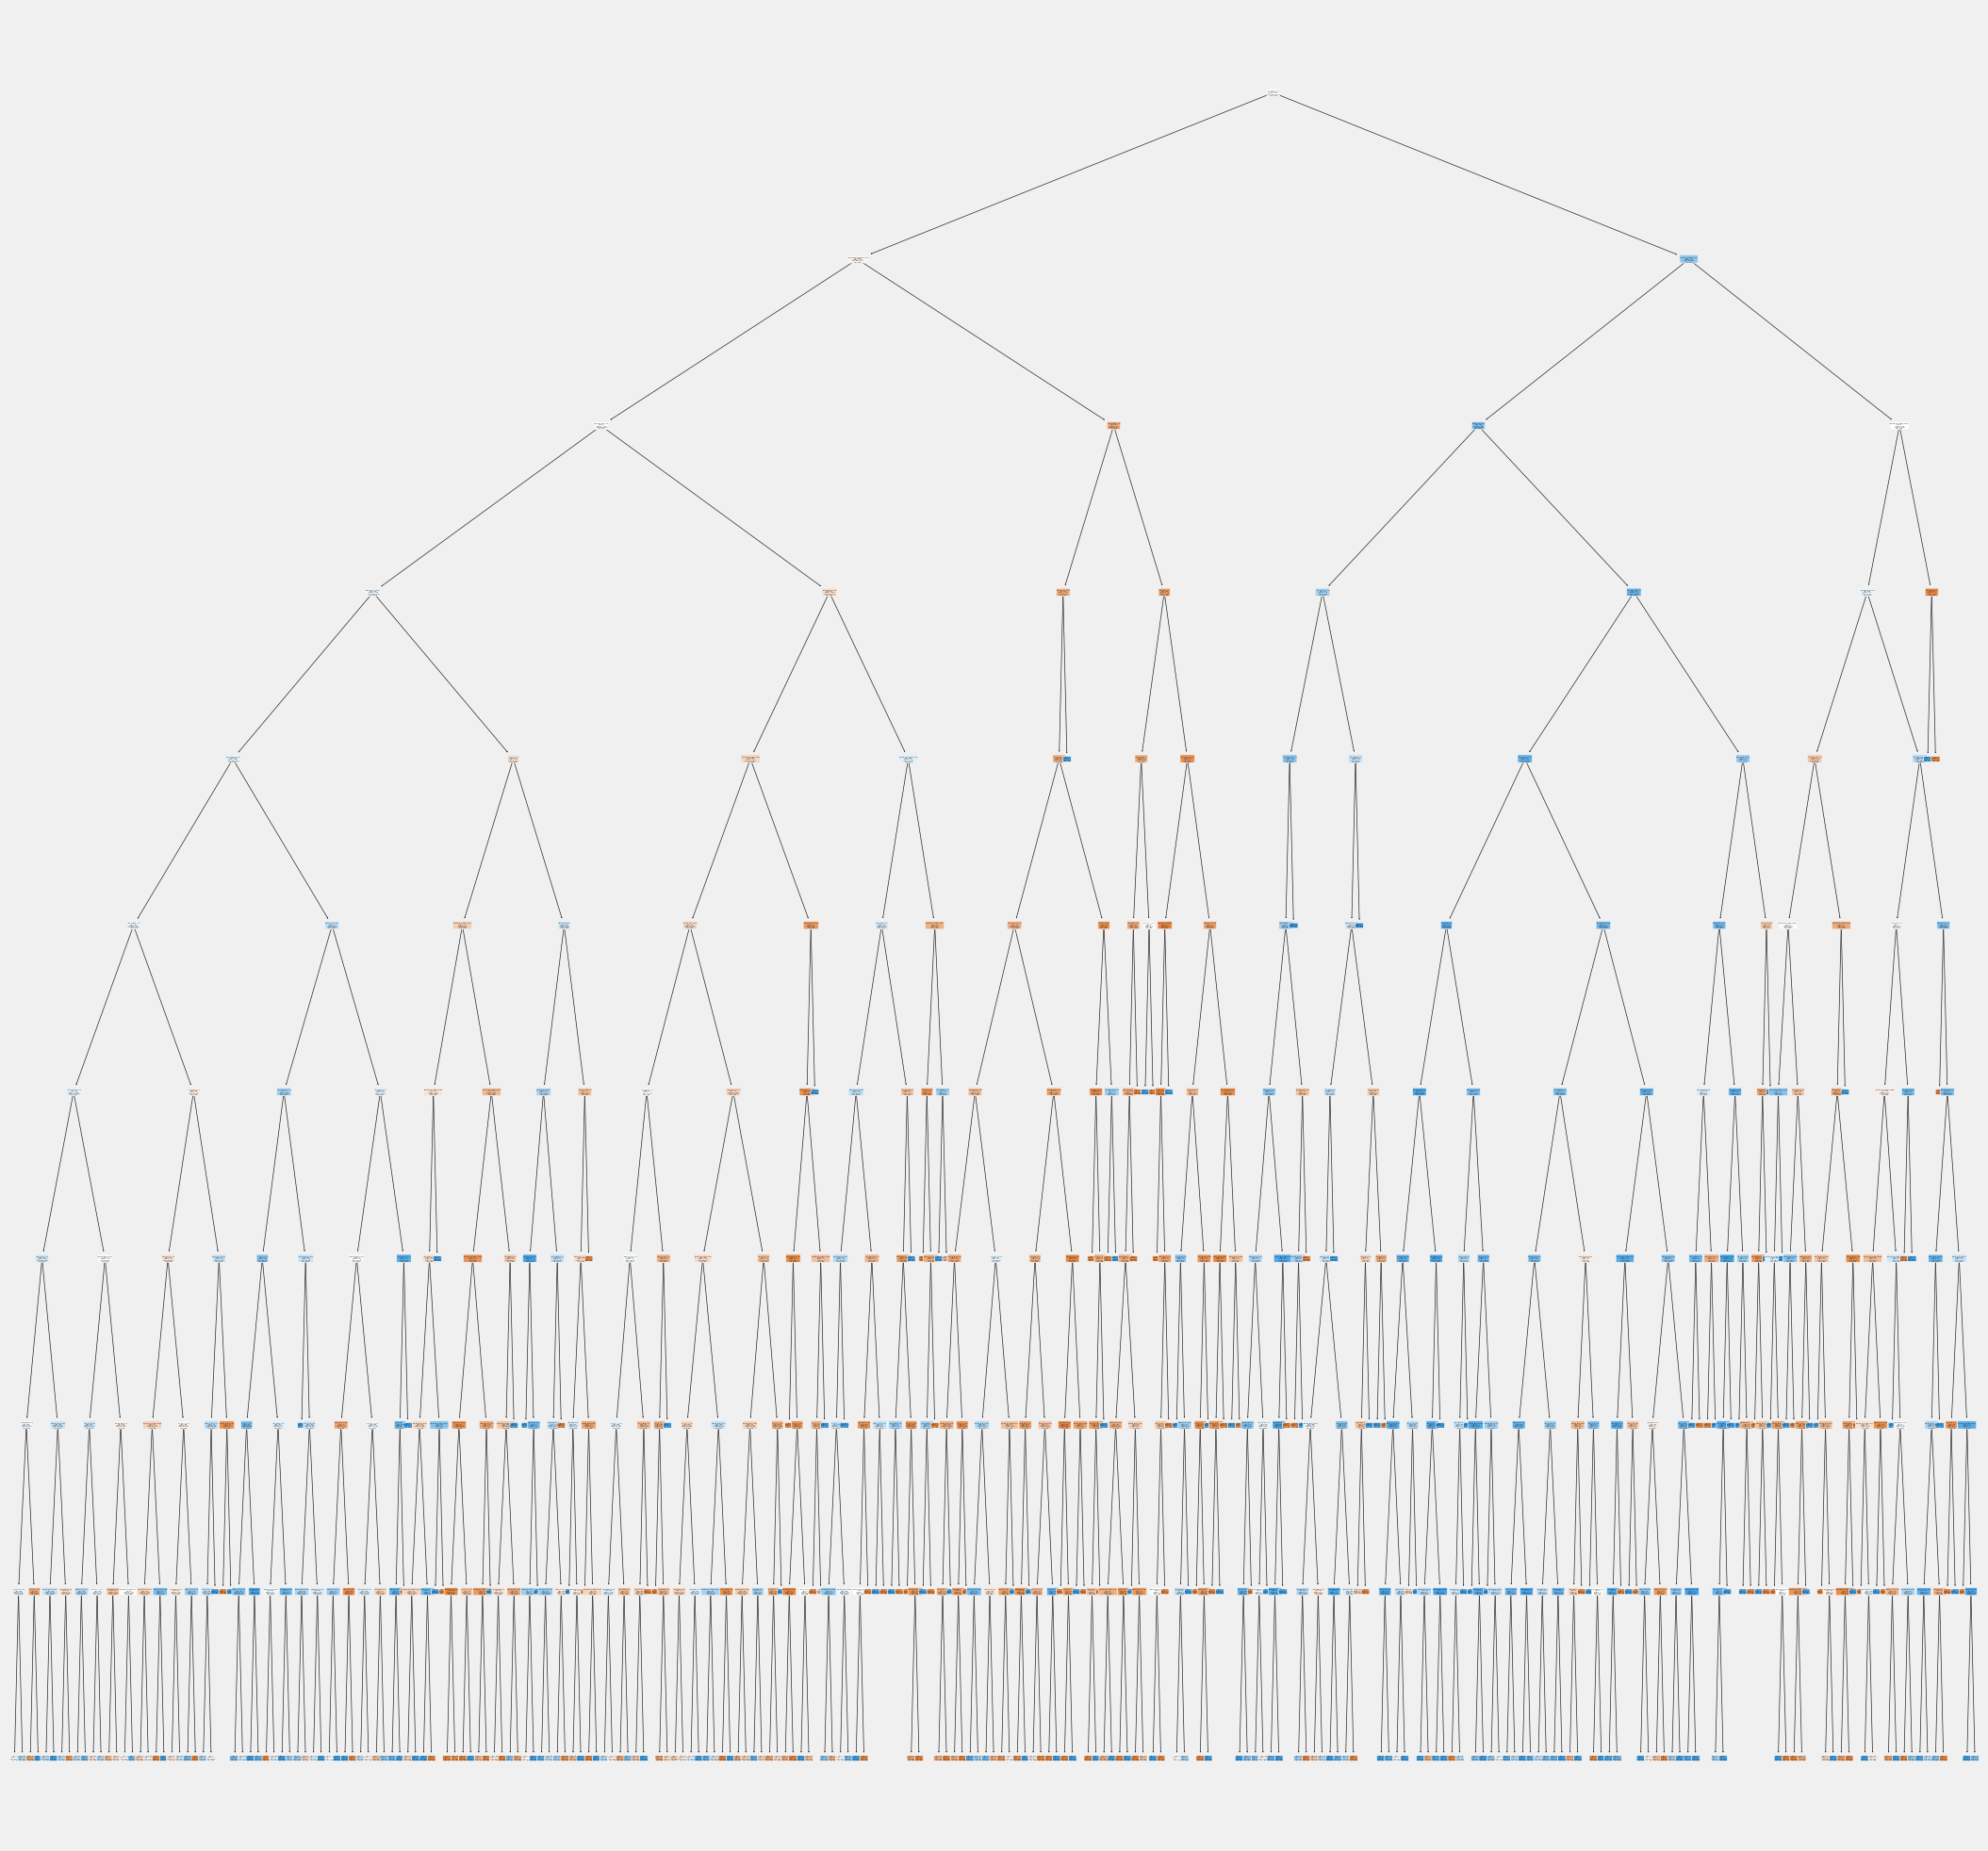

In [11]:
# Extract Response and Predictors
y = games['recommend']
X = games.drop('recommend', axis = 1)

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 10)  
dectree.fit(X_train, y_train)                    

# Plot the trained Decision Tree
f = plt.figure(figsize=(24,24))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns, 
          class_names=["bad","good"])

Train Data
Accuracy  :	 0.6510879848628193

TPR Train :	 0.5842569979334962
TNR Train :	 0.7188869830379264

FPR Train :	 0.2811130169620736
FNR Train :	 0.41574300206650383


<AxesSubplot:>

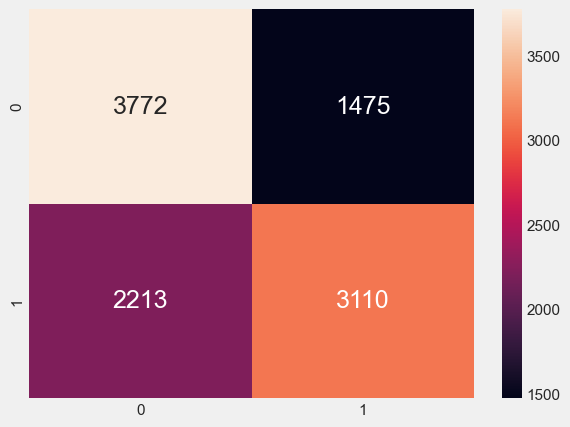

In [12]:
# Predict the Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)

# Print the Classification Accuracy
print("Train Data")
print("Accuracy  :\t", dectree.score(X_train, y_train))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTrain = confusion_matrix(y_train, y_train_pred)
tpTrain = cmTrain[1][1] # True Positives : Good (1) predicted Good (1)
fpTrain = cmTrain[0][1] # False Positives : Bad (0) predicted Good (1)
tnTrain = cmTrain[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTrain = cmTrain[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Train :\t", (tpTrain/(tpTrain + fnTrain)))
print("TNR Train :\t", (tnTrain/(tnTrain + fpTrain)))
print()

print("FPR Train :\t", (fpTrain/(tnTrain + fpTrain)))
print("FNR Train :\t", (fnTrain/(tpTrain + fnTrain)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})

Test Data
Accuracy  :	 0.6121412803532009

TPR Test :	 0.5374943870678042
TNR Test :	 0.6843247937472862

FPR Test :	 0.31567520625271384
FNR Test :	 0.4625056129321958


<AxesSubplot:>

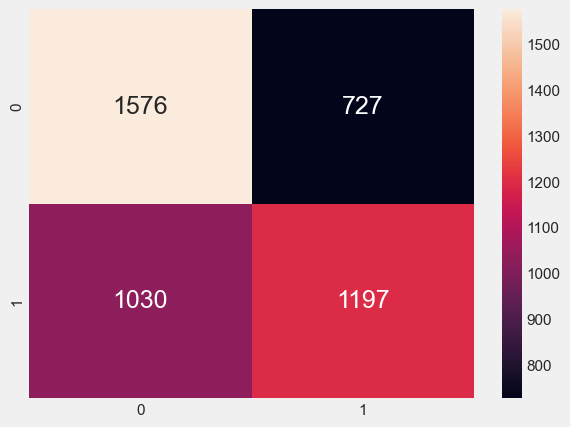

In [13]:
# Import the required metric from sklearn
from sklearn.metrics import confusion_matrix

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Test Data")
print("Accuracy  :\t", dectree.score(X_test, y_test))
print()

# Print the Accuracy Measures from the Confusion Matrix
cmTest = confusion_matrix(y_test, y_test_pred)
tpTest = cmTest[1][1] # True Positives : Good (1) predicted Good (1)
fpTest = cmTest[0][1] # False Positives : Bad (0) predicted Good (1)
tnTest = cmTest[0][0] # True Negatives : Bad (0) predicted Bad (0)
fnTest = cmTest[1][0] # False Negatives : Good (1) predicted Bad (0)

print("TPR Test :\t", (tpTest/(tpTest + fnTest)))
print("TNR Test :\t", (tnTest/(tnTest + fpTest)))
print()

print("FPR Test :\t", (fpTest/(fpTest + tnTest)))
print("FNR Test :\t", (fnTest/(fnTest + tpTest)))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18})